<a href="https://colab.research.google.com/github/dlwogns/ML-DL/blob/main/basic%20implementation/TF_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
x_train = x_train/255
x_test = x_test/255
y_train = y_train/255
y_test = y_test/255

In [5]:
x_train.shape[0]

60000

In [6]:
x_train = x_train.reshape(x_train.shape[0], 28, 28 , 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [7]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)
# one hot encode y data
# to_categorical을 이용해  size 10 의 binary class matrix로 바꾸어준다.

In [8]:
print(y_train[0])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [9]:
learning_rate = 0.001
training_epochs = 12
batch_size = 128

In [10]:
tf.model = tf.keras.Sequential()

In [11]:
# layer 1
tf.model.add(Conv2D(filters = 16, kernel_size = (3,3), input_shape=(28, 28, 1), activation='relu'))
tf.model.add(MaxPooling2D(pool_size=(2,2)))

In [12]:
# layer 2
tf.model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
tf.model.add(MaxPooling2D(pool_size=(2,2)))

In [13]:
# layer 3 (fully connected layer)
tf.model.add(Flatten())
tf.model.add(Dense(units=10, kernel_initializer = 'glorot_normal', activation='softmax'))

In [14]:
tf.model.compile(loss='categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(lr=learning_rate), metrics=['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [15]:
tf.model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 10)                8

In [16]:
history = tf.model.fit(x_train, y_train, batch_size = batch_size, epochs = training_epochs)

Epoch 1/12
469/469 [==============================] - 13s 5ms/step - loss: 0.0542 - accuracy: 0.9911
Epoch 2/12
469/469 [==============================] - 2s 4ms/step - loss: 1.1156e-06 - accuracy: 1.0000
Epoch 3/12
469/469 [==============================] - 2s 4ms/step - loss: 2.9655e-07 - accuracy: 1.0000
Epoch 4/12
469/469 [==============================] - 2s 4ms/step - loss: 1.3460e-07 - accuracy: 1.0000
Epoch 5/12
469/469 [==============================] - 2s 4ms/step - loss: 7.4567e-08 - accuracy: 1.0000
Epoch 6/12
469/469 [==============================] - 2s 4ms/step - loss: 4.5730e-08 - accuracy: 1.0000
Epoch 7/12
469/469 [==============================] - 2s 4ms/step - loss: 2.9866e-08 - accuracy: 1.0000
Epoch 8/12
469/469 [==============================] - 2s 4ms/step - loss: 2.0466e-08 - accuracy: 1.0000
Epoch 9/12
469/469 [==============================] - 2s 4ms/step - loss: 1.4414e-08 - accuracy: 1.0000
Epoch 10/12
469/469 [==============================] - 2s 4ms/step 

In [17]:
evaluation = tf.model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 4.8995e-09 - accuracy: 1.0000


In [18]:
print('loss: ', evaluation[0])

loss:  4.899497696442268e-09


In [19]:
print('accuracy: ', evaluation[1])

accuracy:  1.0


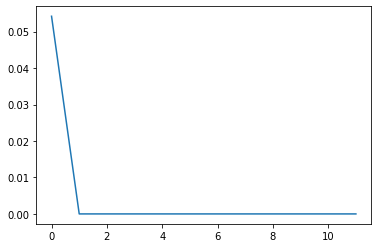

In [20]:
plt.plot(history.history['loss'])

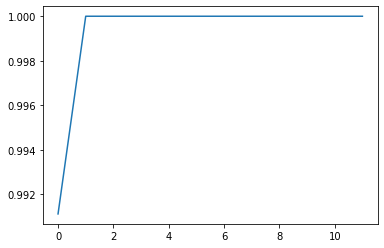

In [21]:
plt.plot(history.history['accuracy'])